<a href="https://colab.research.google.com/github/mynameis-sohee/Machine-Learning-Study/blob/main/%5BRegression%5D_%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%26_%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### House Price 연습 데이터셋을 활용하여, **단순선형회귀와 다중선형회귀의 기본적 사용법**을 알아보겠습니다.

In [ ]:
# 필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
from matplotlib import style
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## **Upload Data Set**

In [ ]:
# data set 로드
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')

In [ ]:
# data set 확인
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
# data set 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# data float 형태 변환 0000 -> 0,000 (ex:GarageYrBlt)
pd.set_option('display.float_format','{:,.1f}'.format)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.0",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.0",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.0",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
df['SalePrice'].describe()

count     1,460.0
mean    180,921.2
std      79,442.5
min      34,900.0
25%     129,975.0
50%     163,000.0
75%     214,000.0
max     755,000.0
Name: SalePrice, dtype: float64

## **Split Test Data & Train Data**

In [ ]:
# test 데이터와 train 데이터 분리
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2)
for i in df_train, df_test : i=i.reset_index(inplace=True,drop=True)

In [ ]:
# df가 잘 분리되었는지 확인
print(df_train.count().sum())
print(df_test.count().sum())

89052
22243


In [ ]:
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1927,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,656,656,GasA,...,Y,SBrkr,968,0,0,968,0,0,2,0,4,1,TA,5,Typ,0,NaN,Detchd,"1,928.0",Unf,1,216,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500
1,1156,20,RL,90.0,10768,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,1Story,5,8,1976,2004,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Gd,ALQ,1157,Unf,0,280,1437,GasA,...,Y,SBrkr,1437,0,0,1437,1,0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,"1,976.0",RFn,2,528,TA,TA,Y,0,21,0,0,180,0,NaN,NaN,NaN,0,7,2007,WD,Normal,218000


## **Find Outliers - Using Baseline Model** 

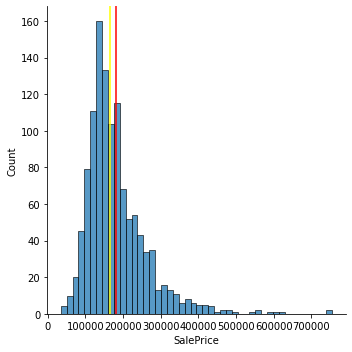

In [ ]:
## 확률밀도함수
sns.displot(df_train['SalePrice'])

#평균과 중간값 수직선
plt.axvline(df_train['SalePrice'].mean(),color='red')
plt.axvline(df_train['SalePrice'].median(),color='yellow')

 **(1) Mean값 활용해 간단한 기준모델 구현 - 결과 : 선형 데이터의 특성을 읽지 못하며 오류가 매우 큼**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



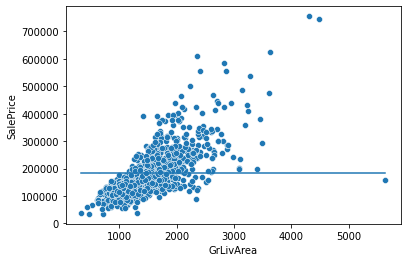

In [ ]:
pred = df_train['SalePrice'].mean()
error = pred - df_train['SalePrice']
mae = error.abs().mean()

sns.scatterplot(df_train['GrLivArea'],df_train['SalePrice'])
sns.lineplot(df_train['GrLivArea'],pred)

**(2) 단순선형회귀**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'House Price')

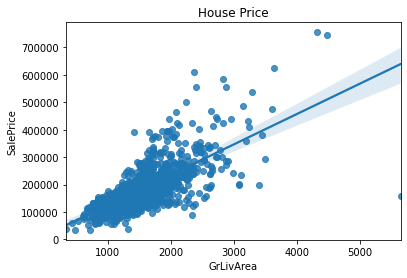

In [ ]:
sns.regplot(df_train['GrLivArea'],df_train['SalePrice']).set_title('House Price')

In [ ]:
# 선형회귀모델 인스턴스
lr=LinearRegression()

feature=['GrLivArea']
target=['SalePrice']

X_train, X_test=df_train[feature], df_test[feature]
y_train, y_test=df_train[target], df_test[target]

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 새로운 target값으로 예측
pred=lr.predict([[4000]])
print('GrLivArea가 4000일 때 예측값 : ',pred.round(2))

GrLivArea가 4000일 때 예측값 :  [[457397.21]]


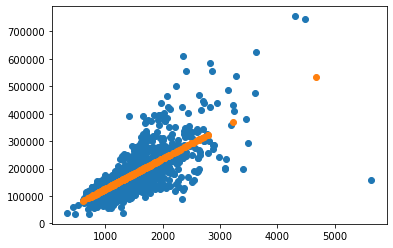

In [ ]:
# 실제 X_test값으로 예측
pred=lr.predict(X_test)
plt.scatter(X_train,y_train)
plt.scatter(X_test,pred)

In [ ]:
#mae 확인
mae = mean_absolute_error(y_test, pred)
print('mae: ',mae)

mae:  39497.38011523304


In [ ]:
# Coefficients & intercept(절편: 독립변수가 모두 0일때 종속변수 y 값)
print(lr.coef_, lr.intercept_) 

[[110.66740979]] [14727.57127662]


**(2) 다중선형회귀 활용**

Text(0.5, 0.98, 'House Price')

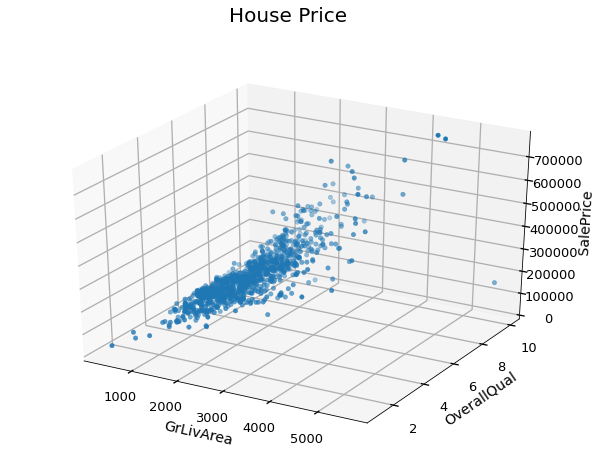

In [ ]:
#OverallQual 특성을 추가해 분석 - 그래프 (1)
feature = ['GrLivArea','OverallQual']
style.use('seaborn-talk')

ax=plt.figure().gca(projection='3d')
ax.scatter(df_train[feature[0]], df_train[feature[1]], df_train[target])
ax.set_xlabel(feature[0],labelpad=15) #라벨 간격
ax.set_ylabel(feature[1], labelpad=10)
ax.set_zlabel(target[0], labelpad=15)

plt.suptitle('House Price', fontsize=20)

In [ ]:
#OverallQual 특성을 추가해 분석 - 그래프 (2)
px.scatter_3d(df_train, x='GrLivArea', y='OverallQual', z='SalePrice',title='House Price')

In [ ]:
# 다중모델 학습 - MAE 평가지표로 단순선형 모델과 비교
lr.fit(df_train[feature],df_train[target])
pred=lr.predict(df_test[feature])
mae_1 = mean_absolute_error(pred, df_test[target])
print('mae : ',mae_1)

if mae>mae_1:
  print('다중선형 학습 모델은 단순선형 학습 모델보다 {}만큼 mae 값이 더 적다.'.format(round(mae-mae_1,2)))
else:
  print('단순선형 학습 모델은 다중선형 학습 모델보다 {}만큼 mae 값이 더 적다.'.format(round(mae_1-mae,2)))

mae :  29007.74529783036
다중선형 학습 모델은 단순선형 학습 모델보다 10489.63만큼 mae 값이 더 적다.


In [ ]:
# 이외 회귀 모델의 평가지표
mae = mean_absolute_error(df_test[target],pred)
mse = mean_squared_error(df_test[target],pred)
r2 = r2_score(df_test[target],pred)
print('mae: ',mae,'\nmse: ',mse,'\nr2: ',r2)

mae:  29007.74529783036 
mse:  1662092878.7631946 
r2:  0.6871258535326786


In [ ]:
# Coefficients & intercept
print(lr.coef_, lr.intercept_)

[[   59.10868607 32829.03940894]] [-107529.22190613]


### 결론

**대체적으로**, 단순선형회귀 모델보다 **다중선형회귀 모델의 성능이 더 좋음**


회귀 모델은 **MAE, MSE, RMSE, MSLE, RMSLE, R^2** 등을 지표로 삼음

R^2값을 제외한 나머지 지표는 **값이 작을수록** 모델성능이 좋다고 평가

R^2값은 **0과 1**사이에 존재하며, **값이 클수록** 모델성능이 좋다고 평가